In [1]:
import pandas as pd
dataset = pd.read_csv('final.csv')

In [2]:
dataset['order_date'] = pd.to_datetime(dataset['order_date'])

In [3]:
dataset.head(30)

,order_id,order_date,product_id,our_price,mrp,ship_postal_code,quantity,free_item,revenue,City,State,month_year,name,ean_code,hsn_code,our_price_log_zscore_capped,mrp_log_zscore_capped,quantity_log_zscore_capped,revenue_log_zscore_capped
0,6267852,2019-07-01,98798,186,265,635126,1,0,186,Krishnagiri,Tamilnadu,2019-07,Biotique Bio Bhringraj Therapeutic Oil For Fal...,8906009459554,30039011,186,265,1,186
1,6267857,2019-07-01,152858,194,215,413504,1,0,194,Dharashiv,Maharashtra,2019-07,Good Vibes Rosehip Radiant Glow Face Serum | L...,8904362500005,33049910,194,215,1,194
2,6267869,2019-07-01,160170,0,399,495445,1,1,0,Bilaspur,Chattisgarh,2019-07,Stay Quirky Lipstick Soft Matte Minis|12 in 1|...,PPLP1214SQBML1,33041000,0,399,1,0
3,6267870,2019-07-01,142756,40,80,452010,5,0,200,Indore City,Madhya Pradesh,2019-07,NY Bae Matte Nail Enamel - Veggies On Rice 6 (...,NYBMNL06,33049920,40,80,4,200
4,6267870,2019-07-01,142761,30,60,411015,5,0,150,Pune City East,Maharashtra,2019-07,NY Bae Creme Nail Enamel - Hot Dog 1 (6 ml) | ...,NYBCNL01,33049920,30,60,4,150
5,6267871,2019-07-01,152858,108,215,208001,1,0,108,Kanpur HO,Uttar Pradesh,2019-07,Good Vibes Rosehip Radiant Glow Face Serum | L...,8904362500005,33049910,108,215,1,108
6,6267872,2019-07-01,150118,107,165,635109,1,0,107,Krishnagiri,Tamilnadu,2019-07,Stay Quirky Daily Wear Liquid Foundation For F...,SQLF0001,33049990,107,165,1,107
7,6267873,2019-07-01,171828,113,225,683513,1,0,113,Alwaye,Kerala,2019-07,Good Vibes Vitamin C & B3 Skin Glow Face Serum...,8904362502719,33049990,113,225,1,113
8,6267875,2019-07-01,152858,151,215,795004,1,0,151,Manipur,North Eastern,2019-07,Good Vibes Rosehip Radiant Glow Face Serum | L...,8904362500005,33049910,151,215,1,151
9,6267880,2019-07-01,150118,0,165,273001,1,1,0,Gorakhpur,Uttar Pradesh,2019-07,Stay Quirky Daily Wear Liquid Foundation For F...,SQLF0001,33049990,0,165,1,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11256508 entries, 0 to 11256507
Data columns (total 19 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   order_id                     int64         
 1   order_date                   datetime64[ns]
 2   product_id                   int64         
 3   our_price                    int64         
 4   mrp                          int64         
 5   ship_postal_code             int64         
 6   quantity                     int64         
 7   free_item                    int64         
 8   revenue                      int64         
 9   City                         object        
 10  State                        object        
 11  month_year                   object        
 12  name                         object        
 13  ean_code                     object        
 14  hsn_code                     int64         
 15  our_price_log_zscore_capped  int64         
 16

In [5]:
time_series_cols = ['product_id', 'order_date', 'ean_code', 'our_price', 'mrp', 'quantity', 'revenue', 'free_item']
ts_df = dataset[time_series_cols].copy()

ts_df['order_date'] = pd.to_datetime(ts_df['order_date'])

In [6]:
ts_df.head(10)

,product_id,order_date,ean_code,our_price,mrp,quantity,revenue,free_item
0,98798,2019-07-01,8906009459554,186,265,1,186,0
1,152858,2019-07-01,8904362500005,194,215,1,194,0
2,160170,2019-07-01,PPLP1214SQBML1,0,399,1,0,1
3,142756,2019-07-01,NYBMNL06,40,80,5,200,0
4,142761,2019-07-01,NYBCNL01,30,60,5,150,0
5,152858,2019-07-01,8904362500005,108,215,1,108,0
6,150118,2019-07-01,SQLF0001,107,165,1,107,0
7,171828,2019-07-01,8904362502719,113,225,1,113,0
8,152858,2019-07-01,8904362500005,151,215,1,151,0
9,150118,2019-07-01,SQLF0001,0,165,1,0,1


In [7]:
ts_df = ts_df.reset_index()

agg_funcs = {
    'ean_code': 'first',
    'our_price': 'first',
    'mrp': 'first',
    'quantity': 'sum',
    'revenue': 'sum'
}

ts_df = ts_df.groupby(['product_id', 'order_date'], as_index=False).agg(agg_funcs)

In [8]:
ts_df.set_index(['product_id', 'order_date'], inplace=True)

all_dates = pd.date_range(ts_df.index.get_level_values('order_date').min(),
                          ts_df.index.get_level_values('order_date').max(),
                          freq='D')
all_products = ts_df.index.get_level_values('product_id').unique()

multi_index = pd.MultiIndex.from_product([all_products, all_dates], names=['product_id', 'order_date'])

ts_df = ts_df.reindex(multi_index).reset_index()

In [9]:
ts_df.head(30)

,product_id,order_date,ean_code,our_price,mrp,quantity,revenue
0,3927,2019-07-01,8901030289354,234.0,260.0,4.0,936.0
1,3927,2019-07-02,8901030289354,234.0,260.0,4.0,936.0
2,3927,2019-07-03,NaN,NaN,NaN,NaN,NaN
3,3927,2019-07-04,8901030289354,234.0,260.0,2.0,468.0
4,3927,2019-07-05,8901030289354,234.0,260.0,2.0,468.0
5,3927,2019-07-06,8901030289354,234.0,260.0,1.0,234.0
6,3927,2019-07-07,NaN,NaN,NaN,NaN,NaN
7,3927,2019-07-08,8901030289354,234.0,260.0,2.0,468.0
8,3927,2019-07-09,8901030289354,234.0,260.0,3.0,702.0
9,3927,2019-07-10,8901030289354,260.0,260.0,4.0,1040.0


In [10]:
import pandas as pd
import numpy as np

numeric_cols = [ 'our_price', 'mrp', 'quantity', 'revenue']

price_cols = ['our_price', 'mrp', 'ean_code']
zero_fill_cols = ['quantity', 'revenue']

ts_df['order_date'] = pd.to_datetime(ts_df['order_date'])
ts_df['year'] = ts_df['order_date'].dt.year
ts_df['month'] = ts_df['order_date'].dt.month

monthly_qty = ts_df.groupby(['year', 'month'])['quantity'].sum().unstack(level=0)

prev_year_sum = monthly_qty.loc[range(1,7), 2021].sum()
this_year_sum = monthly_qty.loc[range(1,7), 2022].sum()
growth_factor = (this_year_sum / prev_year_sum) if prev_year_sum > 0 else 1.0

print(f"growth factor: {growth_factor:.4f}")

july_2022 = ts_df[(ts_df['year'] == 2022) & (ts_df['month'] == 7)].copy()
july_2021 = ts_df[(ts_df['year'] == 2021) & (ts_df['month'] == 7)].copy()

july_2021_lookup = july_2021[['product_id', 'order_date'] + numeric_cols].copy()
july_2021_lookup['order_date'] = july_2021_lookup['order_date'] + pd.DateOffset(years=1)
july_2021_lookup = july_2021_lookup.rename(columns={col: f'{col}_prev' for col in numeric_cols})

merged = july_2022.merge(july_2021_lookup, on=['product_id', 'order_date'], how='left')

for col in numeric_cols:
    if col == 'quantity' or col == 'revenue':
        scaled_prev = merged[f'{col}_prev'] * growth_factor
        merged[col] = merged[col].fillna(scaled_prev)
    else:
        merged[col] = merged[col].fillna(merged[f'{col}_prev'])


merged.drop(columns=[f'{col}_prev' for col in numeric_cols], inplace=True)

merged[price_cols] = merged.groupby('product_id')[price_cols].transform(lambda g: g.ffill().bfill())
merged[zero_fill_cols] = merged[zero_fill_cols].fillna(0)

mask_july_2022 = (ts_df['year'] == 2022) & (ts_df['month'] == 7)
ts_df.loc[mask_july_2022, numeric_cols] = merged[numeric_cols].values

ts_df[price_cols] = ts_df.groupby('product_id')[price_cols].transform(lambda g: g.ffill().bfill())
ts_df[zero_fill_cols] = ts_df[zero_fill_cols].fillna(0)

ts_df.reset_index(drop=True, inplace=True)


growth factor: 1.1631


C:\Users\hp\AppData\Local\Temp\ipykernel_22192\1429122395.py:40: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged[price_cols] = merged.groupby('product_id')[price_cols].transform(lambda g: g.ffill().bfill())


In [11]:
july_2022_imputed = ts_df[(ts_df['order_date'].dt.year == 2022) & (ts_df['order_date'].dt.month == 7)]
columns_to_show = ['product_id', 'order_date'] + numeric_cols
july_2022_imputed[columns_to_show].head(50)

,product_id,order_date,our_price,mrp,quantity,revenue
1096,3927,2022-07-01,234.0,260.0,0.000000,0.000000
1097,3927,2022-07-02,234.0,260.0,0.000000,0.000000
1098,3927,2022-07-03,234.0,260.0,0.000000,0.000000
1099,3927,2022-07-04,234.0,260.0,0.000000,0.000000
1100,3927,2022-07-05,234.0,260.0,0.000000,0.000000
1101,3927,2022-07-06,234.0,260.0,0.000000,0.000000
1102,3927,2022-07-07,234.0,260.0,0.000000,0.000000
1103,3927,2022-07-08,234.0,260.0,0.000000,0.000000
1104,3927,2022-07-09,234.0,260.0,0.000000,0.000000
1105,3927,2022-07-10,234.0,260.0,0.000000,0.000000


In [12]:
ts_df['month_year'] = ts_df['order_date'].dt.to_period('M')

In [13]:
ts_df['discount'] = np.where(
    ts_df['mrp'] > 0,
    (ts_df['mrp'] - ts_df['our_price']) / ts_df['mrp'] * 100,
    0
).round()

In [14]:
ts_df.describe()

,product_id,order_date,our_price,mrp,quantity,revenue,year,month,discount
count,942084.000000,942084,942084.000000,942084.000000,942084.000000,9.420840e+05,942084.000000,942084.000000,942084.000000
mean,200179.764187,2021-02-13 12:00:00.000000768,247.633695,307.182253,15.637032,2.673401e+03,2020.611953,6.635522,22.160037
min,3927.000000,2019-07-01 00:00:00,-14.000000,1.000000,0.000000,0.000000e+00,2019.000000,1.000000,0.000000
25%,170845.000000,2020-04-22 18:00:00,99.000000,129.000000,0.000000,0.000000e+00,2020.000000,4.000000,5.000000
50%,193487.000000,2021-02-13 12:00:00,169.000000,225.000000,0.000000,0.000000e+00,2021.000000,7.000000,20.000000
75%,248955.000000,2021-12-07 06:00:00,299.000000,350.000000,6.000000,1.013000e+03,2021.000000,9.000000,33.000000
max,314065.000000,2022-09-30 00:00:00,2715.000000,2715.000000,15225.000000,1.358787e+06,2022.000000,12.000000,123.000000
std,60625.254296,NaN,255.348370,293.664884,73.437124,1.078251e+04,1.003408,3.343570,20.079669


In [15]:
ts_df.tail(60)

,product_id,order_date,ean_code,our_price,mrp,quantity,revenue,year,month,month_year,discount
942024,314065,2022-08-02,8901138822477,169.0,235.0,0.0,0.0,2022,8,2022-08,28.0
942025,314065,2022-08-03,8901138822477,169.0,235.0,53.0,9071.0,2022,8,2022-08,28.0
942026,314065,2022-08-04,8901138822477,169.0,235.0,48.0,8435.0,2022,8,2022-08,28.0
942027,314065,2022-08-05,8901138822477,188.0,235.0,41.0,7176.0,2022,8,2022-08,20.0
942028,314065,2022-08-06,8901138822477,188.0,235.0,47.0,8228.0,2022,8,2022-08,20.0
942029,314065,2022-08-07,8901138822477,188.0,235.0,41.0,7252.0,2022,8,2022-08,20.0
942030,314065,2022-08-08,8901138822477,188.0,235.0,56.0,9901.0,2022,8,2022-08,20.0
942031,314065,2022-08-09,8901138822477,169.0,235.0,57.0,9899.0,2022,8,2022-08,28.0
942032,314065,2022-08-10,8901138822477,188.0,235.0,22.0,3908.0,2022,8,2022-08,20.0
942033,314065,2022-08-11,8901138822477,188.0,235.0,6.0,1109.0,2022,8,2022-08,20.0


In [16]:
top_ean_codes = ts_df.groupby('ean_code')['quantity'].sum().nlargest(10).index.tolist()

products_per_ean = {}

for ean in top_ean_codes:
    names = ts_df[ts_df['ean_code'] == ean]['product_id'].unique().tolist()
    products_per_ean[ean] = names

for ean, products in products_per_ean.items():
    print(f"EAN Code: {ean}")
    for p in products:
        print(f"  - {p}")
    print()


EAN Code: 8904362500005
  - 152858
  - 203483
  - 220930
  - 252399
  - 267303

EAN Code: 8904362502719
  - 171828
  - 213969
  - 225925
  - 233008
  - 294273

EAN Code: 8904352001642
  - 98857
  - 297075

EAN Code: 806360320204
  - 4521
  - 165202

EAN Code: PPLP1214AG3
  - 148566
  - 219115
  - 274479

EAN Code: 6902395722434
  - 182458
  - 283404
  - 298556

EAN Code: 8904362502993
  - 131320
  - 213941
  - 245026
  - 275485

EAN Code: NYBLE001
  - 140909
  - 224217
  - 238832
  - 272886

EAN Code: 8904362500012
  - 177472
  - 203484
  - 283698

EAN Code: 6902395722403
  - 182497
  - 298554



In [17]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942084 entries, 0 to 942083
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   product_id  942084 non-null  int64         
 1   order_date  942084 non-null  datetime64[ns]
 2   ean_code    942084 non-null  object        
 3   our_price   942084 non-null  float64       
 4   mrp         942084 non-null  float64       
 5   quantity    942084 non-null  float64       
 6   revenue     942084 non-null  float64       
 7   year        942084 non-null  int32         
 8   month       942084 non-null  int32         
 9   month_year  942084 non-null  period[M]     
 10  discount    942084 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int32(2), int64(1), object(1), period[M](1)
memory usage: 71.9+ MB


In [18]:
numeric_cols = ['our_price', 'mrp', 'quantity', 'revenue', 'product_id', 'discount']
ts_df[numeric_cols] = ts_df[numeric_cols].round().astype(int)

In [19]:
ts_df.to_csv('new_required_dataset.csv')

Daily Inventory Forecasting

Validation metrics for EAN 8904362500005:
Random Forest - MAE: 65.71, RMSE: 157.24, R2: 0.982
XGBoost - MAE: 51.35, RMSE: 65.70, R2: 0.997
Linear Regression - MAE: 154.91, RMSE: 296.35, R2: 0.938


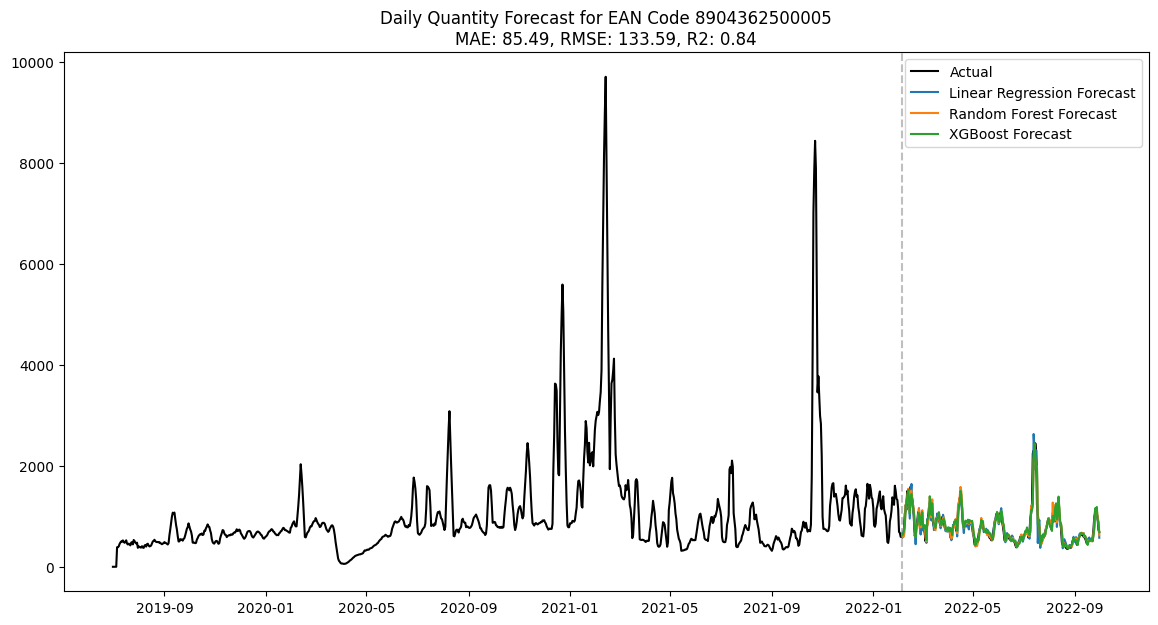

Validation metrics for EAN 8904362502719:
Random Forest - MAE: 37.72, RMSE: 65.49, R2: 0.927
XGBoost - MAE: 0.20, RMSE: 0.30, R2: 1.000
Linear Regression - MAE: 43.07, RMSE: 105.72, R2: 0.811


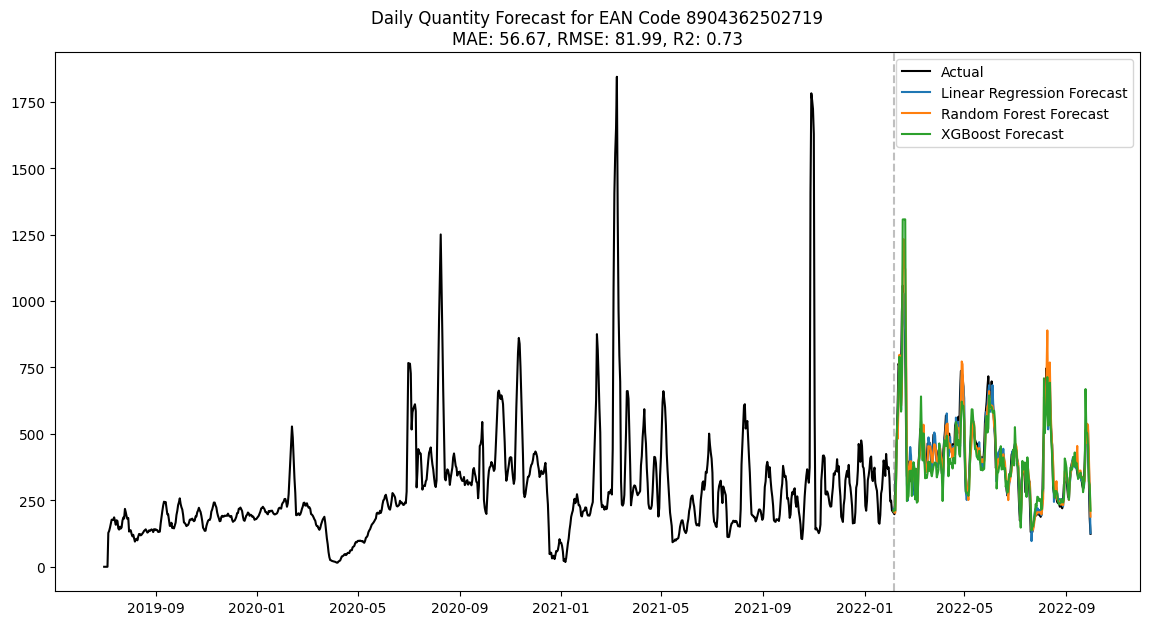

Validation metrics for EAN 8904352001642:
Random Forest - MAE: 15.71, RMSE: 20.77, R2: 0.945
XGBoost - MAE: 13.61, RMSE: 17.29, R2: 0.962
Linear Regression - MAE: 15.72, RMSE: 20.45, R2: 0.947


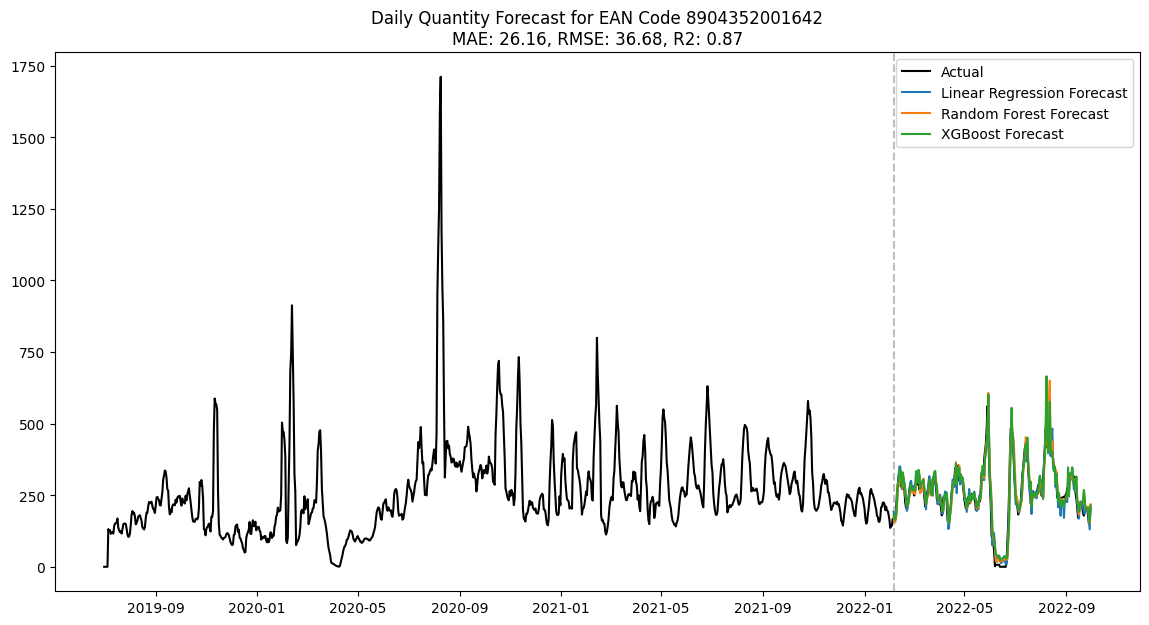

Validation metrics for EAN 806360320204:
Random Forest - MAE: 25.03, RMSE: 35.78, R2: 0.969
XGBoost - MAE: 19.29, RMSE: 25.64, R2: 0.984
Linear Regression - MAE: 44.39, RMSE: 62.07, R2: 0.906


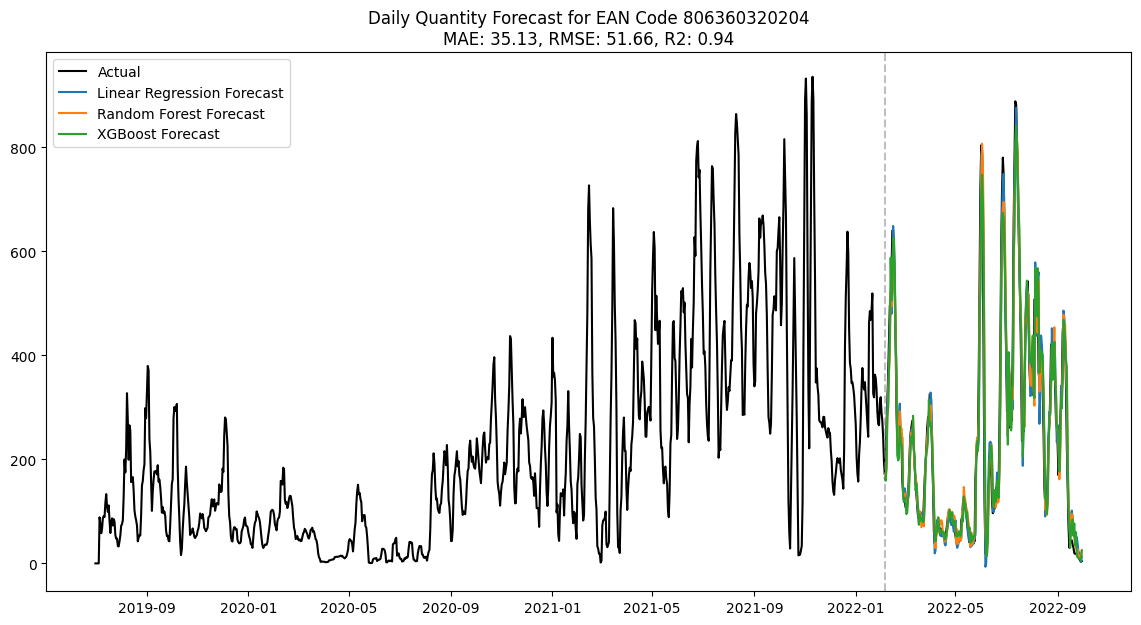

Validation metrics for EAN PPLP1214AG3:
Random Forest - MAE: 8.64, RMSE: 13.69, R2: 0.972
XGBoost - MAE: 1.64, RMSE: 2.22, R2: 0.999
Linear Regression - MAE: 17.59, RMSE: 34.04, R2: 0.829


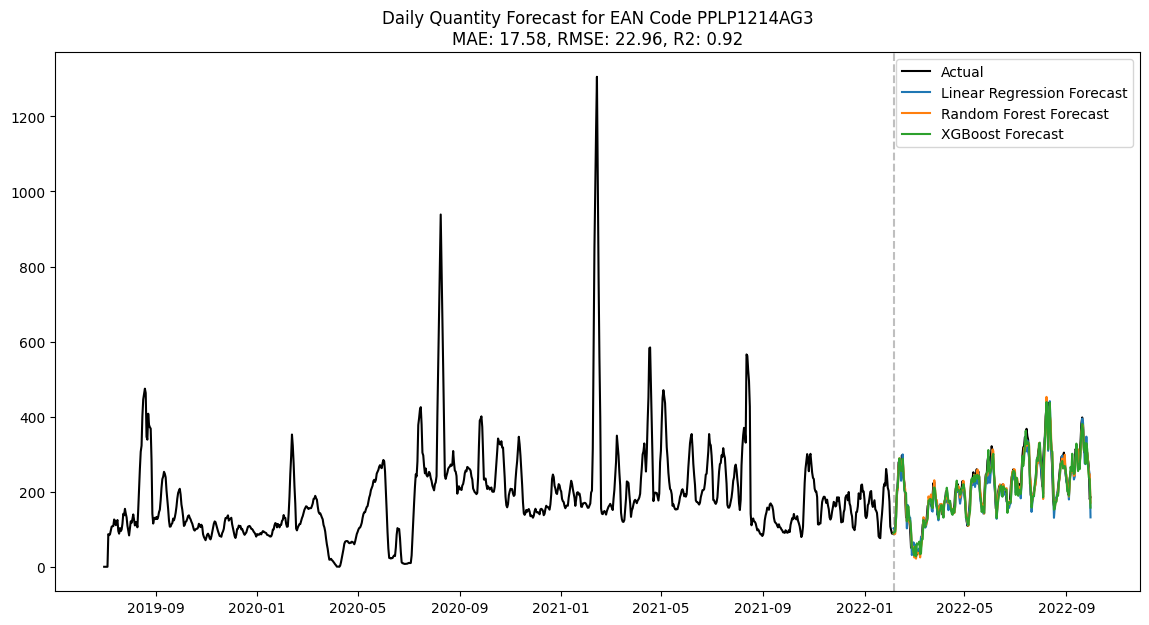

Validation metrics for EAN 6902395722434:
Random Forest - MAE: 20.10, RMSE: 39.43, R2: 0.986
XGBoost - MAE: 0.00, RMSE: 0.00, R2: 1.000
Linear Regression - MAE: 42.54, RMSE: 67.38, R2: 0.958


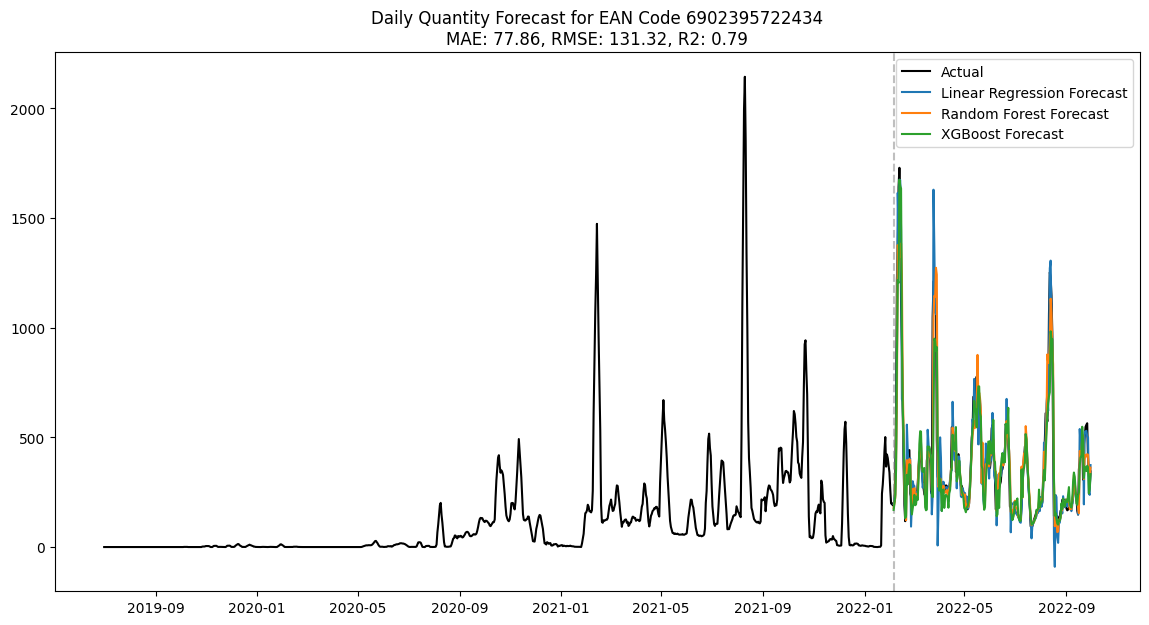

Validation metrics for EAN 8904362502993:
Random Forest - MAE: 23.04, RMSE: 37.20, R2: 0.935
XGBoost - MAE: 5.72, RMSE: 7.58, R2: 0.997
Linear Regression - MAE: 26.90, RMSE: 49.66, R2: 0.883


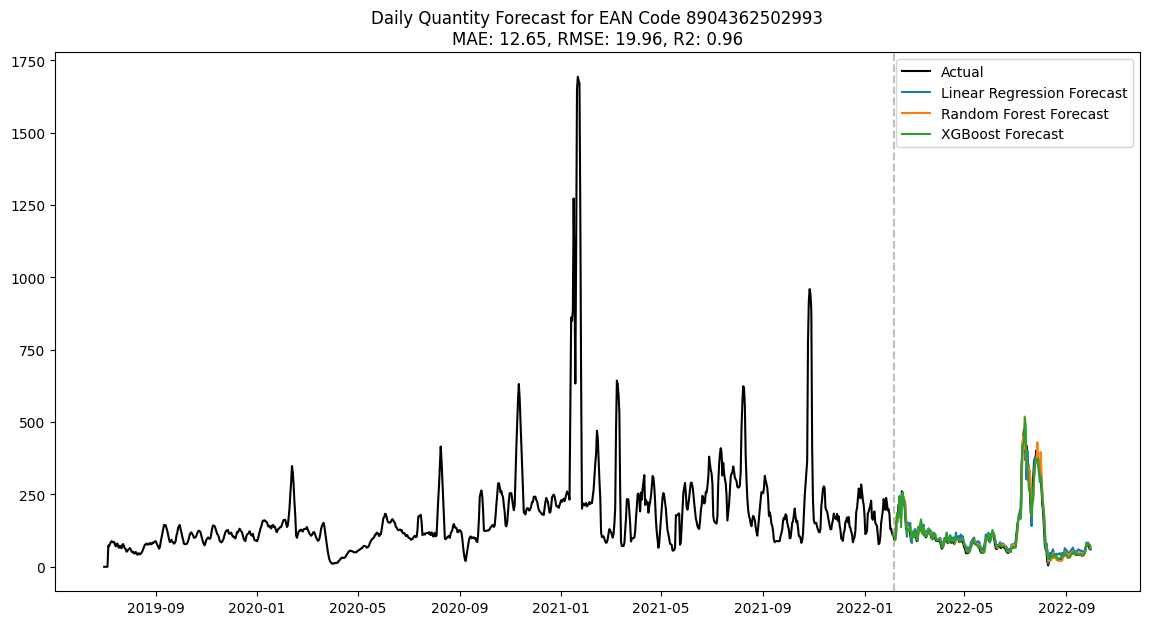

Validation metrics for EAN NYBLE001:
Random Forest - MAE: 12.81, RMSE: 18.29, R2: 0.974
XGBoost - MAE: 15.63, RMSE: 21.97, R2: 0.962
Linear Regression - MAE: 14.48, RMSE: 20.50, R2: 0.967


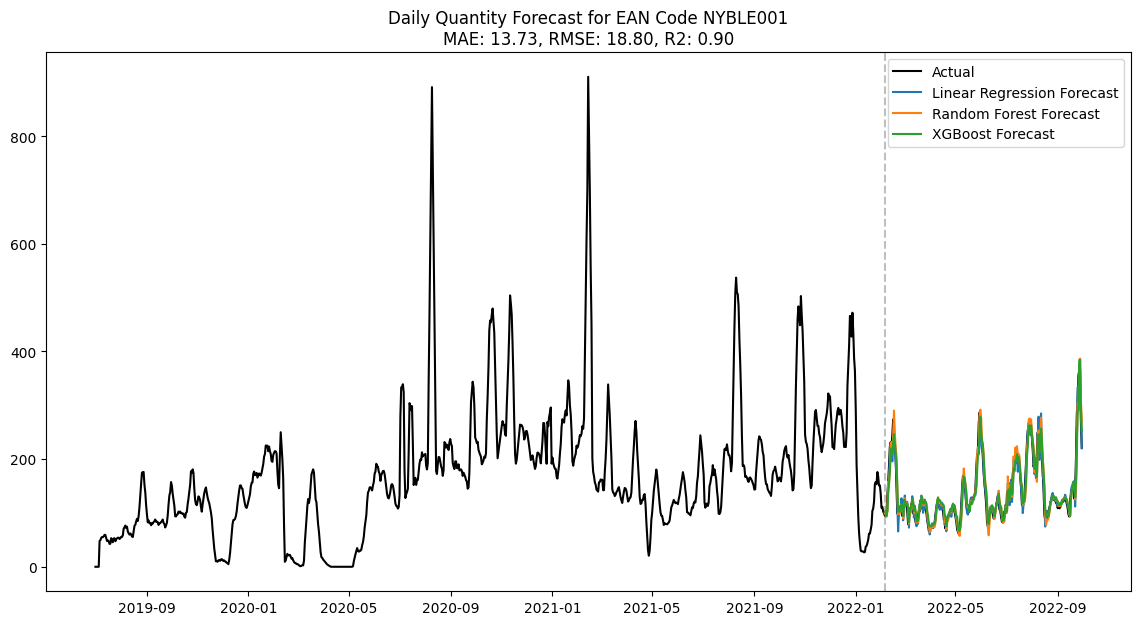

Validation metrics for EAN 8904362500012:
Random Forest - MAE: 5.27, RMSE: 7.35, R2: 0.987
XGBoost - MAE: 10.87, RMSE: 15.19, R2: 0.942
Linear Regression - MAE: 13.24, RMSE: 18.83, R2: 0.911


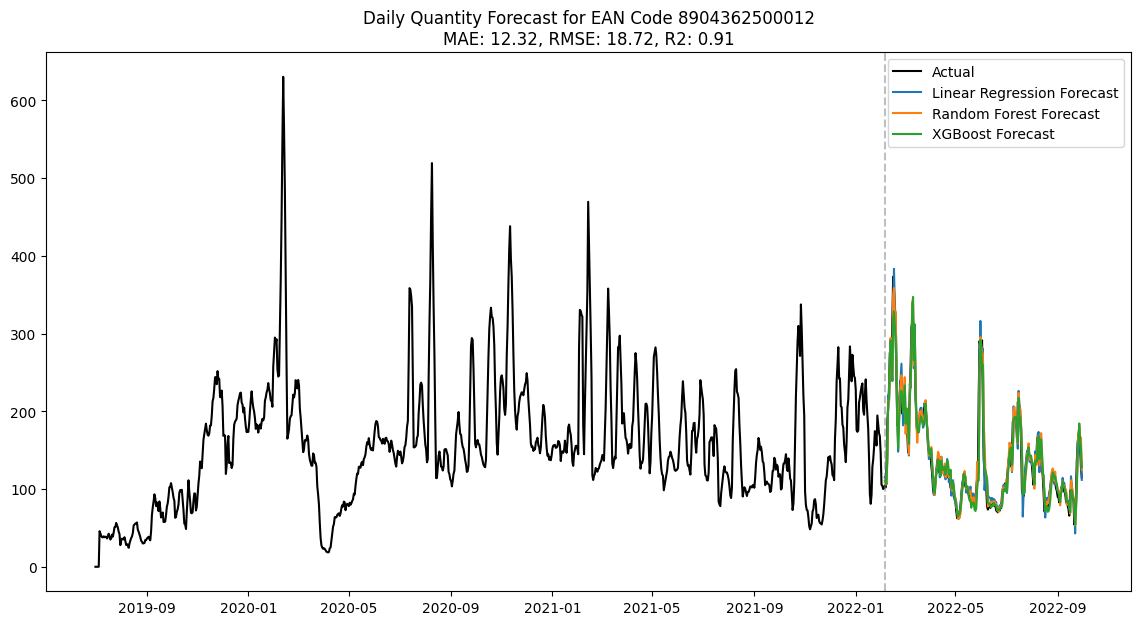

Validation metrics for EAN 6902395722403:
Random Forest - MAE: 25.65, RMSE: 48.04, R2: 0.972
XGBoost - MAE: 0.00, RMSE: 0.00, R2: 1.000
Linear Regression - MAE: 59.81, RMSE: 114.20, R2: 0.844


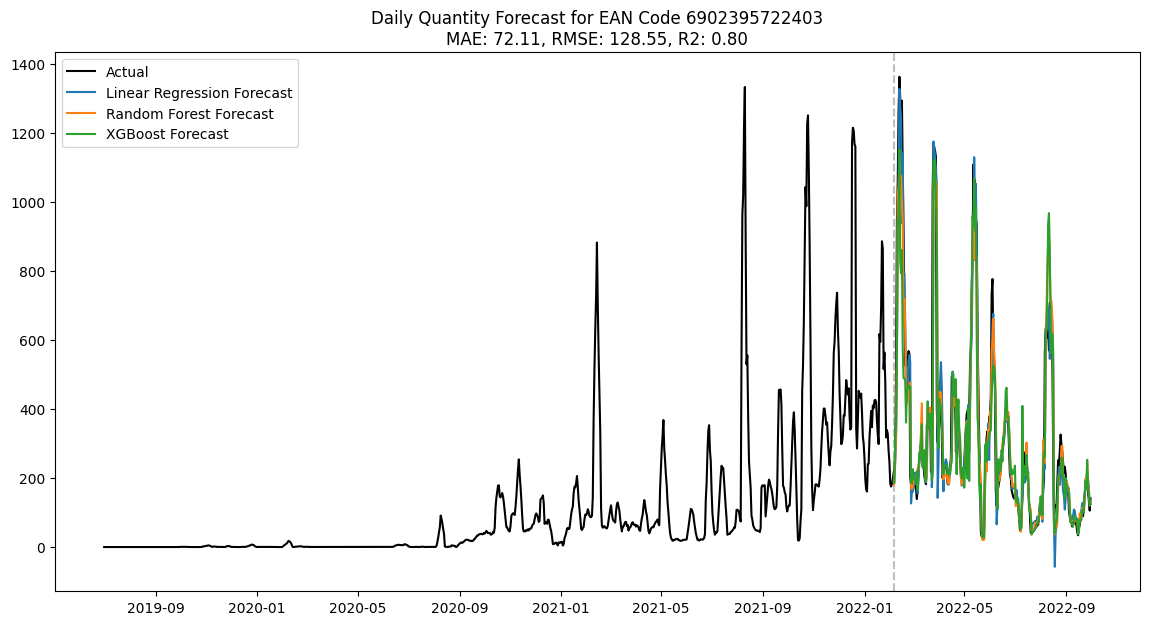

         EAN_Code              Model        MAE        RMSE        R2
0   8904362500005  Linear Regression  84.206957  139.385805  0.824137
1   8904362500005      Random Forest  79.263670  128.356232  0.850868
2   8904362500005            XGBoost  85.493678  133.594283  0.838448
3   8904362502719  Linear Regression  34.827967   50.186748  0.900492
4   8904362502719      Random Forest  42.737931   65.541842  0.830287
5   8904362502719            XGBoost  56.670167   81.991066  0.734410
6   8904352001642  Linear Regression  24.230278   31.276747  0.905654
7   8904352001642      Random Forest  24.940508   36.540357  0.871227
8   8904352001642            XGBoost  26.158463   36.681759  0.870228
9    806360320204  Linear Regression  31.751840   46.566472  0.947792
10   806360320204      Random Forest  35.170682   52.804896  0.932867
11   806360320204            XGBoost  35.132020   51.663136  0.935739
12    PPLP1214AG3  Linear Regression  16.695474   22.810627  0.917358
13    PPLP1214AG3   

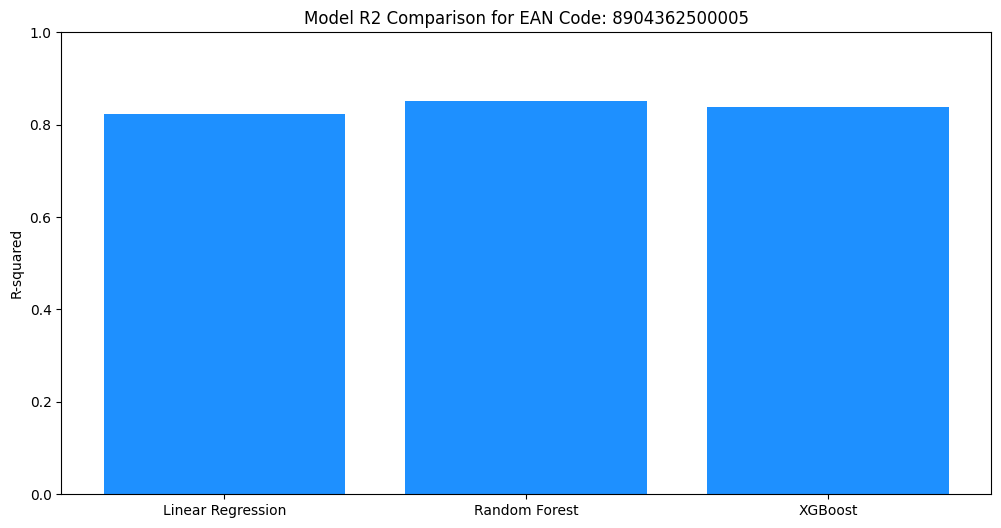

          EAN_Code  Actual  Linear Regression  Random Forest  XGBoost
0    8904362500005   214.0              192.0          180.0    188.0
1    8904362500005   226.0              210.0          188.0    185.0
2    8904362500005   288.0              249.0          251.0    312.0
3    8904362500005   507.0              310.0          335.0    359.0
4    8904362500005   946.0              565.0          558.0    543.0
..             ...     ...                ...            ...      ...
233  8904362500005   189.0              220.0          242.0    252.0
234  8904362500005   161.0              198.0          186.0    166.0
235  8904362500005   132.0              172.0          159.0    151.0
236  8904362500005   106.0              127.0          125.0    119.0
237  8904362500005   141.0              123.0          125.0    127.0

[238 rows x 5 columns]


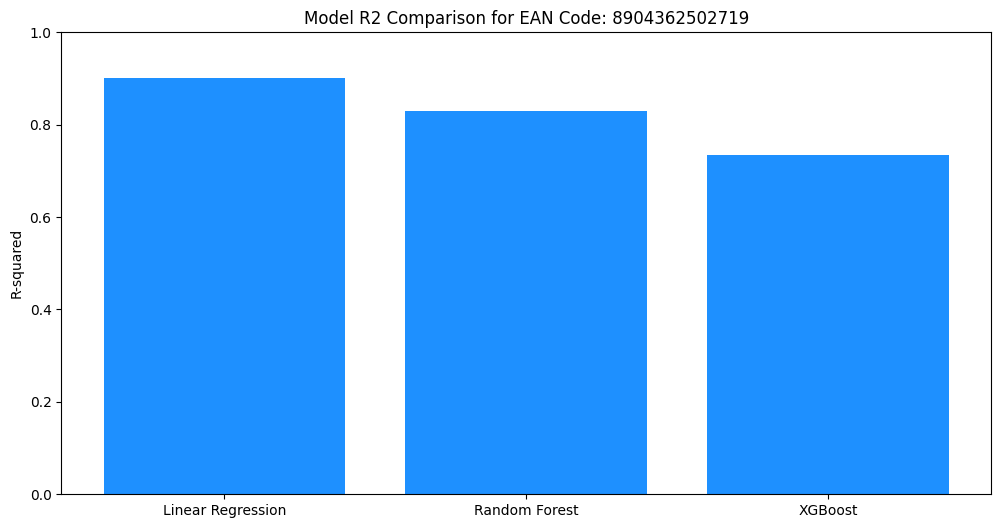

          EAN_Code  Actual  Linear Regression  Random Forest  XGBoost
0    8904362502719   214.0              192.0          180.0    188.0
1    8904362502719   226.0              210.0          188.0    185.0
2    8904362502719   288.0              249.0          251.0    312.0
3    8904362502719   507.0              310.0          335.0    359.0
4    8904362502719   946.0              565.0          558.0    543.0
..             ...     ...                ...            ...      ...
233  8904362502719   189.0              220.0          242.0    252.0
234  8904362502719   161.0              198.0          186.0    166.0
235  8904362502719   132.0              172.0          159.0    151.0
236  8904362502719   106.0              127.0          125.0    119.0
237  8904362502719   141.0              123.0          125.0    127.0

[238 rows x 5 columns]


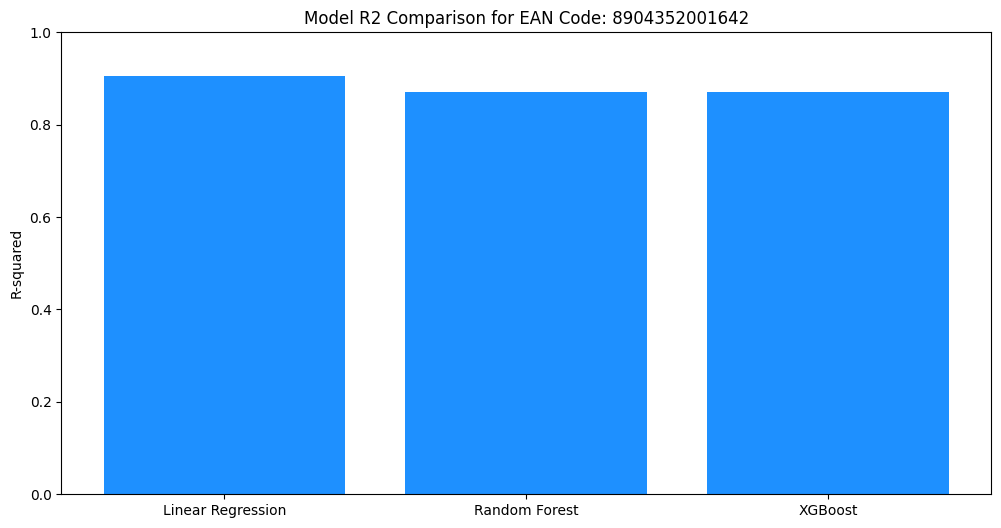

          EAN_Code  Actual  Linear Regression  Random Forest  XGBoost
0    8904352001642   214.0              192.0          180.0    188.0
1    8904352001642   226.0              210.0          188.0    185.0
2    8904352001642   288.0              249.0          251.0    312.0
3    8904352001642   507.0              310.0          335.0    359.0
4    8904352001642   946.0              565.0          558.0    543.0
..             ...     ...                ...            ...      ...
233  8904352001642   189.0              220.0          242.0    252.0
234  8904352001642   161.0              198.0          186.0    166.0
235  8904352001642   132.0              172.0          159.0    151.0
236  8904352001642   106.0              127.0          125.0    119.0
237  8904352001642   141.0              123.0          125.0    127.0

[238 rows x 5 columns]


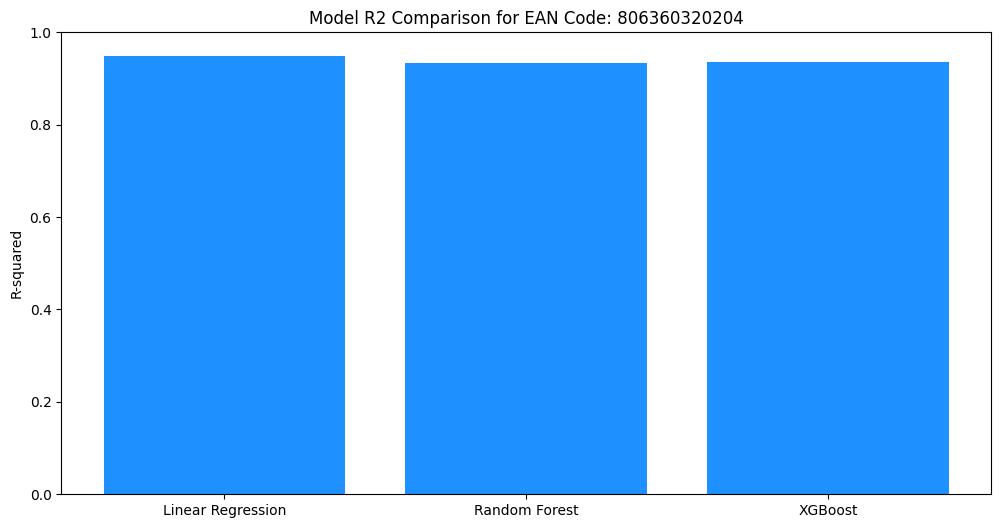

         EAN_Code  Actual  Linear Regression  Random Forest  XGBoost
0    806360320204   214.0              192.0          180.0    188.0
1    806360320204   226.0              210.0          188.0    185.0
2    806360320204   288.0              249.0          251.0    312.0
3    806360320204   507.0              310.0          335.0    359.0
4    806360320204   946.0              565.0          558.0    543.0
..            ...     ...                ...            ...      ...
233  806360320204   189.0              220.0          242.0    252.0
234  806360320204   161.0              198.0          186.0    166.0
235  806360320204   132.0              172.0          159.0    151.0
236  806360320204   106.0              127.0          125.0    119.0
237  806360320204   141.0              123.0          125.0    127.0

[238 rows x 5 columns]


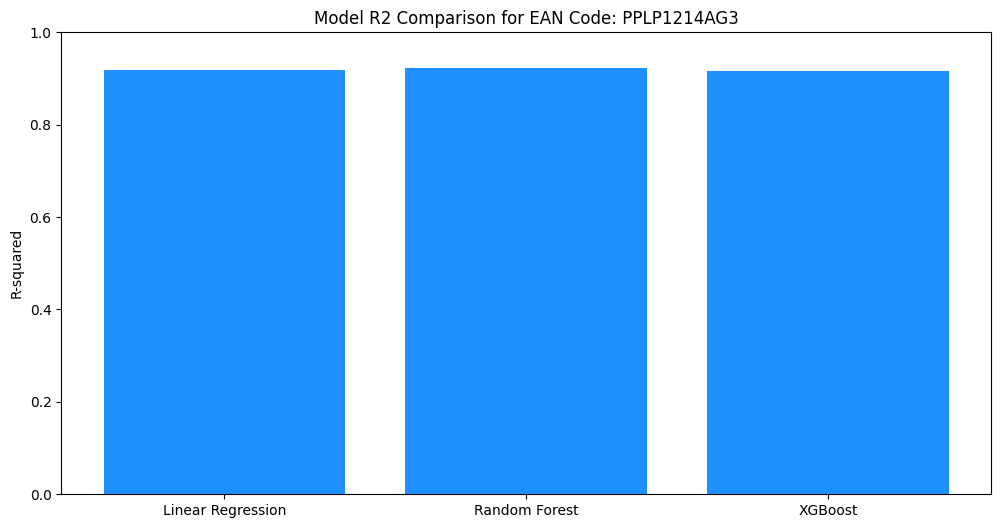

        EAN_Code  Actual  Linear Regression  Random Forest  XGBoost
0    PPLP1214AG3   214.0              192.0          180.0    188.0
1    PPLP1214AG3   226.0              210.0          188.0    185.0
2    PPLP1214AG3   288.0              249.0          251.0    312.0
3    PPLP1214AG3   507.0              310.0          335.0    359.0
4    PPLP1214AG3   946.0              565.0          558.0    543.0
..           ...     ...                ...            ...      ...
233  PPLP1214AG3   189.0              220.0          242.0    252.0
234  PPLP1214AG3   161.0              198.0          186.0    166.0
235  PPLP1214AG3   132.0              172.0          159.0    151.0
236  PPLP1214AG3   106.0              127.0          125.0    119.0
237  PPLP1214AG3   141.0              123.0          125.0    127.0

[238 rows x 5 columns]


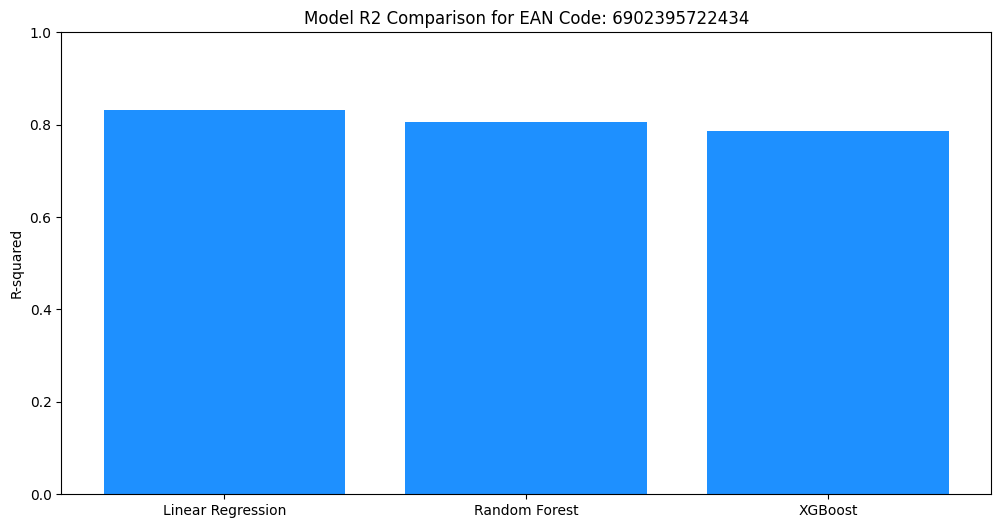

          EAN_Code  Actual  Linear Regression  Random Forest  XGBoost
0    6902395722434   214.0              192.0          180.0    188.0
1    6902395722434   226.0              210.0          188.0    185.0
2    6902395722434   288.0              249.0          251.0    312.0
3    6902395722434   507.0              310.0          335.0    359.0
4    6902395722434   946.0              565.0          558.0    543.0
..             ...     ...                ...            ...      ...
233  6902395722434   189.0              220.0          242.0    252.0
234  6902395722434   161.0              198.0          186.0    166.0
235  6902395722434   132.0              172.0          159.0    151.0
236  6902395722434   106.0              127.0          125.0    119.0
237  6902395722434   141.0              123.0          125.0    127.0

[238 rows x 5 columns]


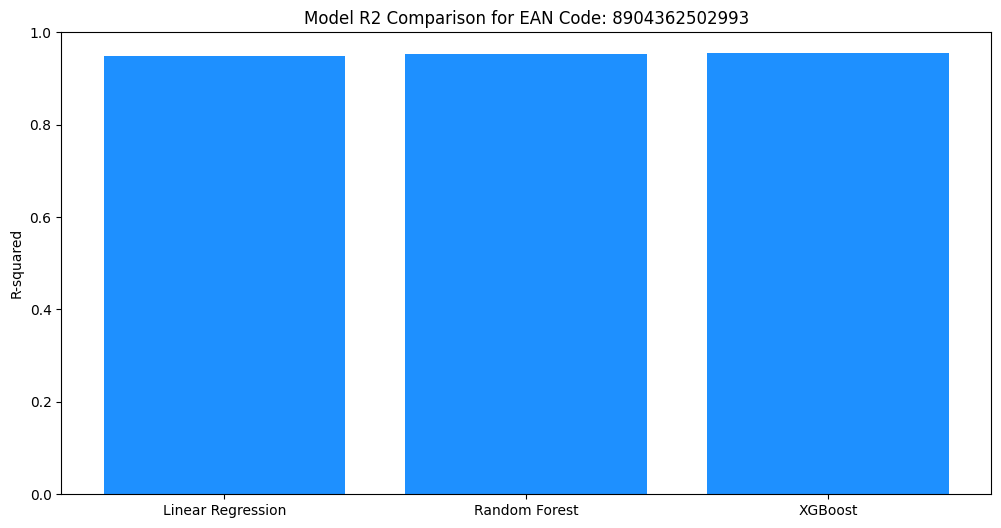

          EAN_Code  Actual  Linear Regression  Random Forest  XGBoost
0    8904362502993   214.0              192.0          180.0    188.0
1    8904362502993   226.0              210.0          188.0    185.0
2    8904362502993   288.0              249.0          251.0    312.0
3    8904362502993   507.0              310.0          335.0    359.0
4    8904362502993   946.0              565.0          558.0    543.0
..             ...     ...                ...            ...      ...
233  8904362502993   189.0              220.0          242.0    252.0
234  8904362502993   161.0              198.0          186.0    166.0
235  8904362502993   132.0              172.0          159.0    151.0
236  8904362502993   106.0              127.0          125.0    119.0
237  8904362502993   141.0              123.0          125.0    127.0

[238 rows x 5 columns]


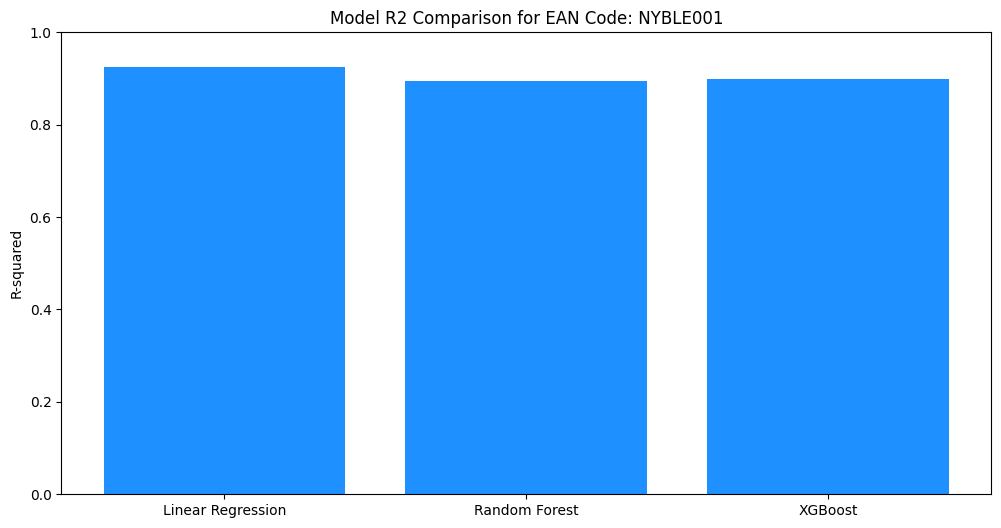

     EAN_Code  Actual  Linear Regression  Random Forest  XGBoost
0    NYBLE001   214.0              192.0          180.0    188.0
1    NYBLE001   226.0              210.0          188.0    185.0
2    NYBLE001   288.0              249.0          251.0    312.0
3    NYBLE001   507.0              310.0          335.0    359.0
4    NYBLE001   946.0              565.0          558.0    543.0
..        ...     ...                ...            ...      ...
233  NYBLE001   189.0              220.0          242.0    252.0
234  NYBLE001   161.0              198.0          186.0    166.0
235  NYBLE001   132.0              172.0          159.0    151.0
236  NYBLE001   106.0              127.0          125.0    119.0
237  NYBLE001   141.0              123.0          125.0    127.0

[238 rows x 5 columns]


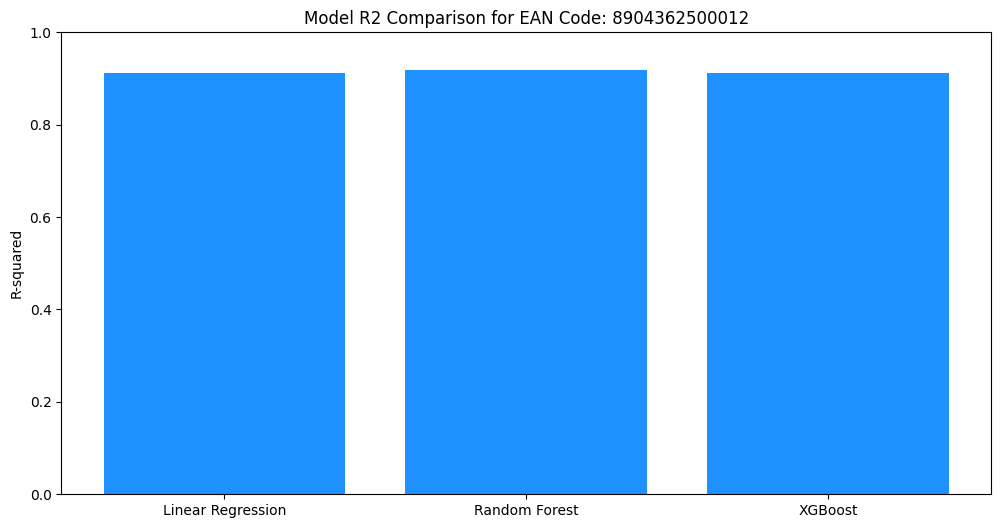

          EAN_Code  Actual  Linear Regression  Random Forest  XGBoost
0    8904362500012   214.0              192.0          180.0    188.0
1    8904362500012   226.0              210.0          188.0    185.0
2    8904362500012   288.0              249.0          251.0    312.0
3    8904362500012   507.0              310.0          335.0    359.0
4    8904362500012   946.0              565.0          558.0    543.0
..             ...     ...                ...            ...      ...
233  8904362500012   189.0              220.0          242.0    252.0
234  8904362500012   161.0              198.0          186.0    166.0
235  8904362500012   132.0              172.0          159.0    151.0
236  8904362500012   106.0              127.0          125.0    119.0
237  8904362500012   141.0              123.0          125.0    127.0

[238 rows x 5 columns]


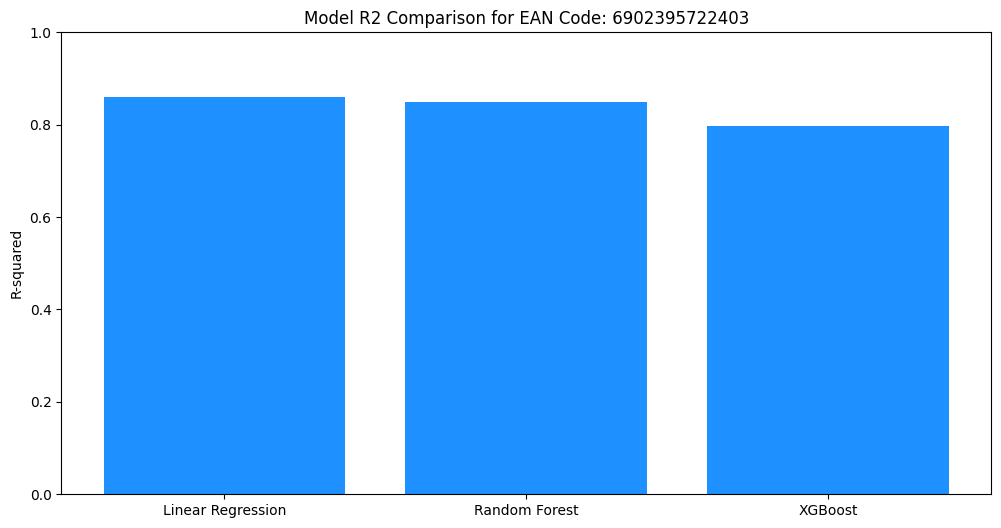

          EAN_Code  Actual  Linear Regression  Random Forest  XGBoost
0    6902395722403   214.0              192.0          180.0    188.0
1    6902395722403   226.0              210.0          188.0    185.0
2    6902395722403   288.0              249.0          251.0    312.0
3    6902395722403   507.0              310.0          335.0    359.0
4    6902395722403   946.0              565.0          558.0    543.0
..             ...     ...                ...            ...      ...
233  6902395722403   189.0              220.0          242.0    252.0
234  6902395722403   161.0              198.0          186.0    166.0
235  6902395722403   132.0              172.0          159.0    151.0
236  6902395722403   106.0              127.0          125.0    119.0
237  6902395722403   141.0              123.0          125.0    127.0

[238 rows x 5 columns]
         EAN_Code              Model        MAE        RMSE        R2
0   8904362500005  Linear Regression  84.206957  139.385805  0.824

In [25]:
import pandas as pd
import numpy as np
import holidays
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import matplotlib.pyplot as plt

def create_daily_features(df):
    df = df.copy()
    # Q1 = df['quantity'].quantile(0.25)
    # Q3 = df['quantity'].quantile(0.75)
    # IQR = Q3 - Q1
    # lower_bound = Q1 - 1.5 * IQR
    # upper_bound = Q3 + 1.5 * IQR
    # df['quantity'] = np.where(df['quantity'] < lower_bound, lower_bound, df['quantity'])
    # df['quantity'] = np.where(df['quantity'] > upper_bound, upper_bound, df['quantity'])
    df['quantity'] = df['quantity'].shift(1).rolling(window=5).mean()
    
    df['lag_1'] = df['quantity'].shift(1)
    df['lag_2'] = df['quantity'].shift(2)
    df['lag_7'] = df['quantity'].shift(7)
    df['roll_mean_3'] = df['quantity'].shift(1).rolling(window=3).mean()
    df['roll_mean_7'] = df['quantity'].shift(1).rolling(window=7).mean()
    df['roll_mean_14'] = df['quantity'].shift(1).rolling(window=14).mean()
    df['dayofweek'] = df.index.dayofweek
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['is_month_start'] = df.index.is_month_start.astype(int)
    df['is_month_end'] = df.index.is_month_end.astype(int)
    df['is_weekend'] = (df.index.dayofweek >= 5).astype(int)

    years = df.index.year.unique()
    ind_holidays = holidays.India(years=years)
    holiday_dates = pd.to_datetime(list(ind_holidays.keys()))
    df['is_holiday'] = df.index.isin(holiday_dates).astype(int)
    df['days_since_last_holiday'] = (df.index.to_series().map(lambda d: (d - holiday_dates[holiday_dates <= d].max()) if any(holiday_dates <= d) else pd.Timedelta('365D'))).dt.days
    df['days_to_next_holiday'] = (df.index.to_series().map(lambda d: (holiday_dates[holiday_dates >= d].min() - d) if any(holiday_dates >= d) else pd.Timedelta('365D'))).dt.days
    df['lag_1_discount'] = df['lag_1'] * df['discount']
    df.fillna(0, inplace=True)
    
    return df

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

ts_df['order_date'] = pd.to_datetime(ts_df['order_date'])
top_products = ts_df.groupby('ean_code')['quantity'].sum().nlargest(10).index.tolist()
results = []

for product in top_products:
    df_prod = ts_df[ts_df['ean_code'] == product].copy()
    df_prod['day_start'] = df_prod['order_date'].dt.floor('D')
    df_daily = df_prod.groupby('day_start').agg({'quantity': 'sum', 'discount': 'median'})
    df_daily.index = pd.to_datetime(df_daily.index)
    df_daily = create_daily_features(df_daily)

    train_size = int(len(df_daily) * 0.8)
    train = df_daily.iloc[:train_size]
    test = df_daily.iloc[train_size:]
    train_ml = train.copy()
    test_ml = test.copy()

    val_size = int(len(train_ml) * 0.2)
    train_final = train_ml.iloc[:-val_size]
    val = train_ml.iloc[-val_size:]

    features = ['lag_1', 'lag_2', 'lag_7', 'roll_mean_3', 'roll_mean_7', 'roll_mean_14', 'dayofweek', 'dayofmonth', 'weekofyear', 'month', 'quarter', 'is_month_start', 'is_month_end', 'is_weekend', 'is_holiday', 'days_since_last_holiday', 'days_to_next_holiday', 'discount', 'lag_1_discount']

    param_grid_rf = {
        'n_estimators': [100, 300],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5]
    }
    tscv = TimeSeriesSplit(n_splits=3)
    grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=0), param_grid_rf, cv=tscv, scoring='neg_mean_squared_error')
    grid_search_rf.fit(train_ml[features], train_ml['quantity'])
    best_rf = grid_search_rf.best_estimator_
    rf_pred = best_rf.predict(test_ml[features])

    param_grid_xgb = {
        'n_estimators': [100, 300],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
    grid_search_xgb = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=0), param_grid_xgb, cv=tscv, scoring='neg_mean_squared_error')
    grid_search_xgb.fit(train_ml[features], train_ml['quantity'])
    best_xgb = grid_search_xgb.best_estimator_
    xgb_pred = best_xgb.predict(test_ml[features])

    lr = LinearRegression().fit(train_ml[features], train_ml['quantity'])
    lr_pred = lr.predict(test_ml[features])

    # Predict on validation set
    rf_val_pred = best_rf.predict(val[features])
    xgb_val_pred = best_xgb.predict(val[features])
    lr_val_pred = lr.predict(val[features])

    # Evaluate on validation data
    y_val_true = val['quantity']
    print(f"Validation metrics for EAN {product}:")
    for name, pred in [('Random Forest', rf_val_pred), ('XGBoost', xgb_val_pred), ('Linear Regression', lr_val_pred)]:
        mae, rmse, r2 = evaluate(y_val_true, pred)
        print(f"{name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.3f}")

    y_true = test_ml['quantity']

    for model_name, pred in [('Linear Regression', lr_pred), ('Random Forest', rf_pred), ('XGBoost', xgb_pred)]:
        mae, rmse, r2 = evaluate(y_true, pred)
        results.append({'EAN_Code': product, 'Model': model_name, 'MAE': mae, 'RMSE': rmse, 'R2': r2})

    plt.figure(figsize=(14,7))
    all_actuals = pd.concat([train['quantity'], test['quantity']])
    plt.plot(all_actuals.index, all_actuals, label='Actual', color='black')
    plt.axvline(x=test.index[0], color='grey', linestyle='--', alpha=0.5)
    plt.plot(test_ml.index, lr_pred, label='Linear Regression Forecast')
    plt.plot(test_ml.index, rf_pred, label='Random Forest Forecast')
    plt.plot(test_ml.index, xgb_pred, label='XGBoost Forecast')
    plt.title(f'Daily Quantity Forecast for EAN Code {product}\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}')
    plt.legend()
    plt.show()

results_df = pd.DataFrame(results)
print(results_df)

for product in top_products:
    prod_res = results_df[results_df['EAN_Code'] == product]
    plt.figure(figsize=(12,6))
    x = prod_res['Model']
    y = prod_res['R2']
    plt.bar(x, y, color='dodgerblue')
    plt.ylim(0,1)
    plt.ylabel("R-squared")
    plt.title(f"Model R2 Comparison for EAN Code: {product}")
    plt.show()


    forecast_dates = test.index
    predictions_df = pd.DataFrame({
        'EAN_Code': product,
        'Actual': test['quantity'].values[:len(forecast_dates)],
        'Linear Regression': lr_pred,
        'Random Forest': rf_pred,
        'XGBoost': xgb_pred
    })
    print(predictions_df.round())

results_df = pd.DataFrame(results)
print(results_df)


In [ ]:
import numpy as np

all_actuals = []
all_lr_preds = []
all_rf_preds = []
all_xgb_preds = []

for product, group in predictions_df.groupby('EAN_Code'):
    all_actuals.append(group['Actual'].values)
    all_lr_preds.append(group['Linear Regression'].values)
    all_rf_preds.append(group['Random Forest'].values)
    all_xgb_preds.append(group['XGBoost'].values)

actuals = np.concatenate(all_actuals)
lr_preds = np.concatenate(all_lr_preds)
rf_preds = np.concatenate(all_rf_preds)
xgb_preds = np.concatenate(all_xgb_preds)

def print_metrics(y_true, y_pred, model_name):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}")

print_metrics(actuals, lr_preds, "Linear Regression")
print_metrics(actuals, rf_preds, "Random Forest")
print_metrics(actuals, xgb_preds, "XGBoost")



Linear Regression - MAE: 57.300, RMSE: 106.533, R2: 0.861
Random Forest - MAE: 62.345, RMSE: 110.912, R2: 0.849
XGBoost - MAE: 72.107, RMSE: 128.547, R2: 0.797
